# Data Visualisation - A comparison of Matplotlib, Seaborn, Bokeh, Plotly express and Plotnine

     Age at MRI  WHO CNS Grade  MGMT index  1-dead 0-alive      OS
0            66              4         0.0               1  1303.0
1            80              4         0.0               1   274.0
2            70              4         0.0               1   417.0
3            70              4         0.0               1   185.0
4            68              4         0.0               1   389.0
..          ...            ...         ...             ...     ...
496          64              4        16.0               0   334.0
497          41              4         0.0               0   287.0
498          72              4        12.0               0   291.0
499          70              2        17.0               0   215.0
500          68              4         0.0               0   199.0

[501 rows x 5 columns]


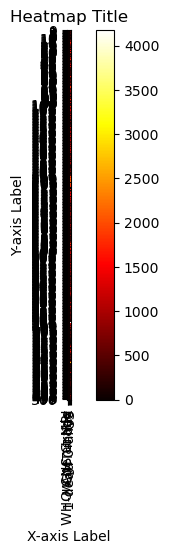

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 3: Read the CSV file
data = pd.read_csv('UCSF-PDGM-metadata_v2.csv')

# Select only the columns with numeric data types (int and float)
data = data.select_dtypes(include=['int64', 'float64'])

# fill NaN values with a default value (e.g., 0)
#data = data.apply(pd.to_numeric, errors='coerce')
data.fillna(0, inplace=True)
print(data)

# Step 4: Convert data to NumPy array and create heatmap
data_array = data.to_numpy()
plt.imshow(data_array, cmap='hot', interpolation='nearest')
plt.colorbar()

# Step 5: Customize the heatmap
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Heatmap Title')
plt.xticks(range(len(data.columns)), data.columns, rotation=90)
plt.yticks(range(len(data.index)), data.index)

# Step 6: Display the heatmap
plt.show()


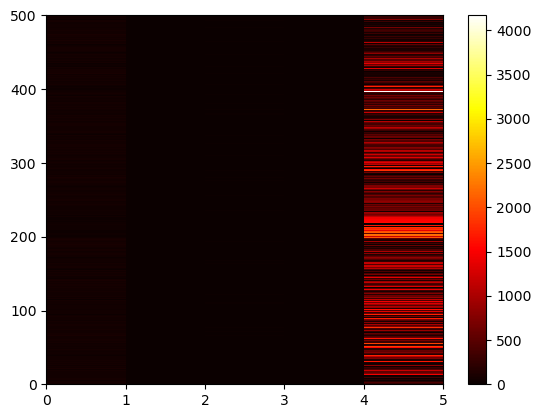

In [21]:
import numpy as np
# Create a meshgrid based on the dimensions of your data
x = np.arange(data_array.shape[1] + 1)
y = np.arange(data_array.shape[0] + 1)
xx, yy = np.meshgrid(x, y)

# Use plt.pcolormesh to plot the heatmap
plt.pcolormesh(xx, yy, data_array, shading='auto', cmap='hot')
plt.colorbar()
# Display the heatmap
plt.show()

# Let us try Seaborn

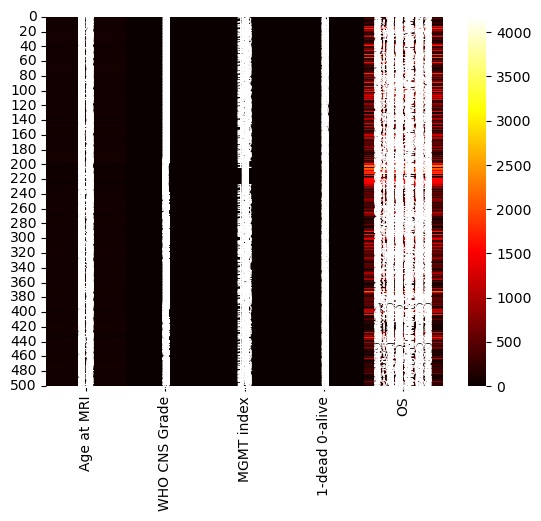

In [4]:
import seaborn as sns
sns.heatmap(data, annot=True, cmap='hot');

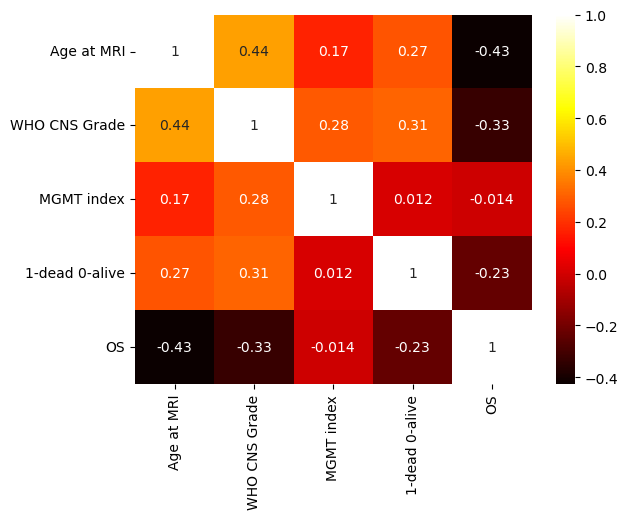

In [23]:
#Finding the pairwise correlation coefficient of the data columns
df = data.corr()
sns.heatmap(df, annot=True, cmap='hot');

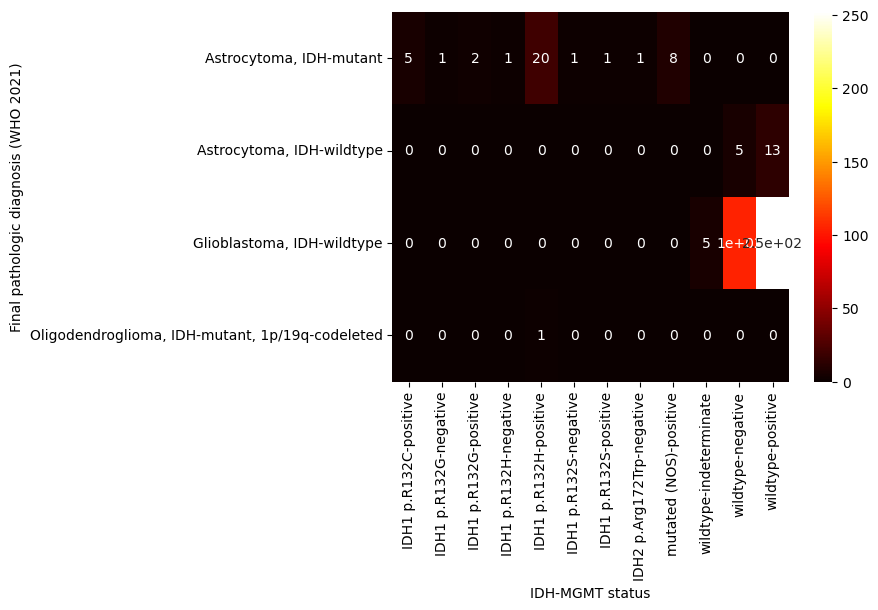

In [6]:
# Choose categorical columns
df = pd.read_csv('UCSF-PDGM-metadata_v2.csv', usecols = ['Sex', 'Final pathologic diagnosis (WHO 2021)', 
                                                         'MGMT status','IDH','EOR',])
#sel_data = df.loc[:, 'Sex':'Biopsy prior to imaging']

#Create a contingency table with max 3 variables
contingency_table1 = pd.crosstab(df['Sex'], df['Final pathologic diagnosis (WHO 2021)'])
contingency_table2 = pd.crosstab(index = df['Final pathologic diagnosis (WHO 2021)'],columns = [df['IDH'], df ['MGMT status']])
sns.heatmap(contingency_table2, annot=True, cmap='hot');

# Seaborn relplot function to see the difference between groups

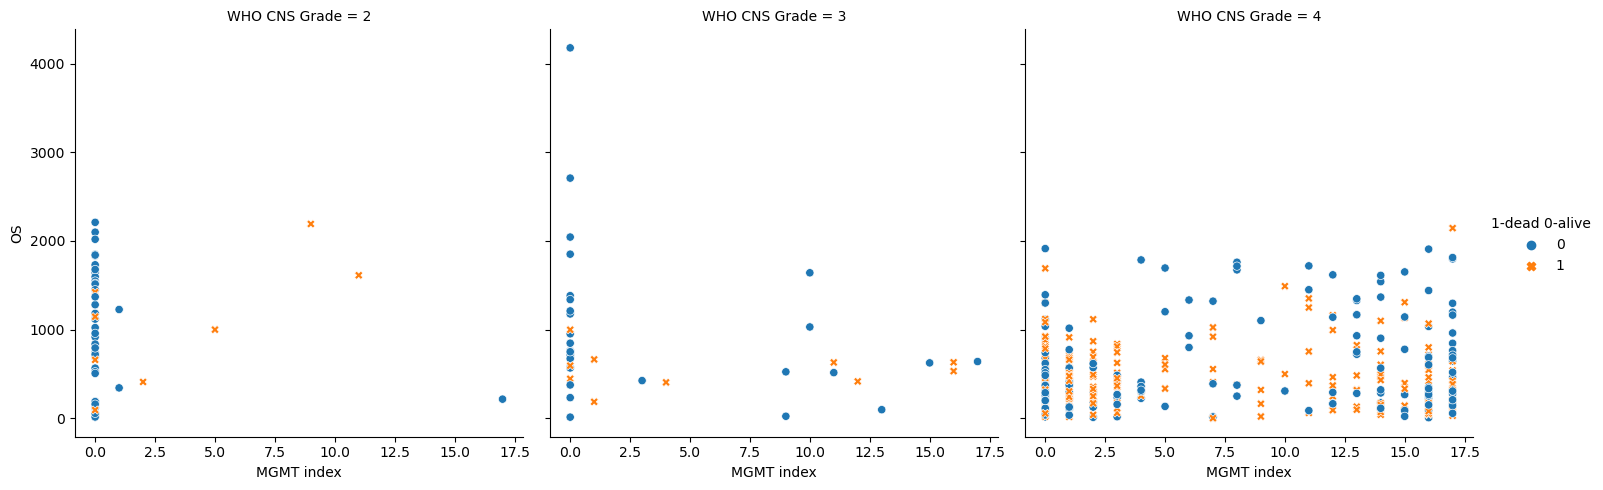

In [10]:
# Relational Plots
sns.relplot(
    data=data,
    x="MGMT index",
    y="OS",
    col="WHO CNS Grade",
   hue="1-dead 0-alive",
    style="1-dead 0-alive",    
)
plt.show()

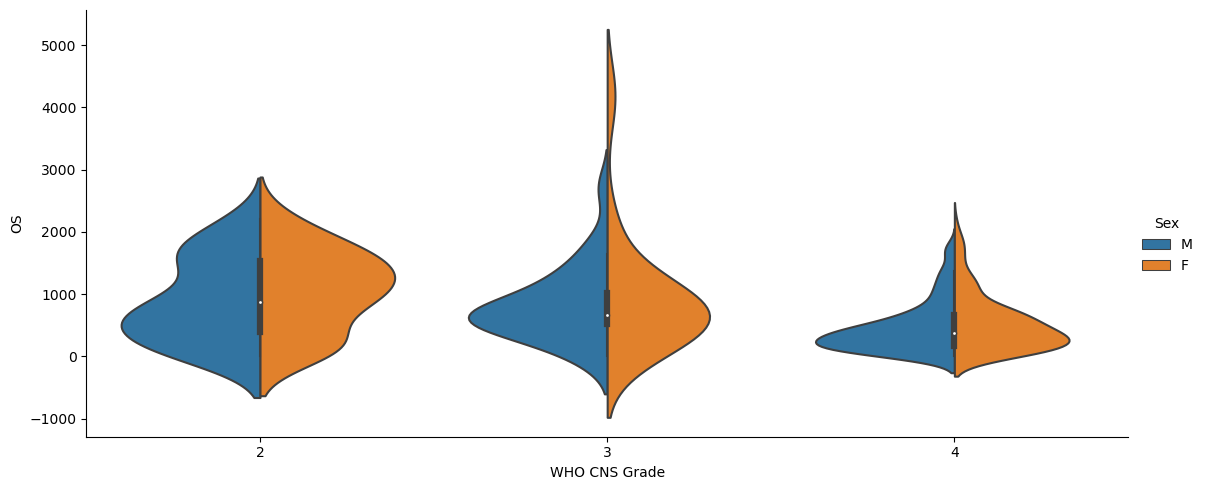

In [12]:
# Violin Plot
data = pd.read_csv('UCSF-PDGM-metadata_v2.csv')
sns.catplot(
    data=data,
    kind="violin",
    x="WHO CNS Grade",
    y="OS",
    hue="Sex",
    split=True,
    height=5,
    aspect=2.3,
)

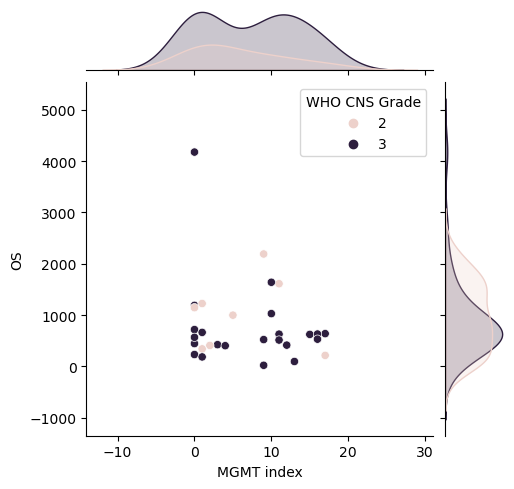

In [16]:
# Joint Plot
newData = data[data['WHO CNS Grade'] != 4]
sns.jointplot(
    data=newData, x="MGMT index", y="OS", hue="WHO CNS Grade", height=5
)


# For more learning, follow - https://www.kaggle.com/code/robikscube/all-python-data-visualization-libraries-in-2022/notebook